<a href="https://colab.research.google.com/github/Kontuzhenyi/AI_python/blob/main/%D0%BF%D0%BE%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# https://archive.ics.uci.edu/dataset/236/seeds
# Целевая переменная сорт пшеницы
# Загрузка данных
dataset = pd.read_csv('seeds.csv', sep=',')
dataset = dataset.drop('compactness', axis=1) # Выражается из первых двух столбцов

In [3]:
dataset.head()

,area,perimeter,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,seeds
0,15.26,14.84,5.763,3.312,2.221,5.220,1
1,14.88,14.57,5.554,3.333,1.018,4.956,1
2,14.29,14.09,5.291,3.337,2.699,4.825,1
3,13.84,13.94,5.324,3.379,2.259,4.805,1
4,16.14,14.99,5.658,3.562,1.355,5.175,1


In [4]:
vals = dataset["seeds"].unique()
vals

array([1, 2, 3])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   length of kernel         210 non-null    float64
 3   width of kernel          210 non-null    float64
 4   asymmetry coefficient    210 non-null    float64
 5   length of kernel groove  210 non-null    float64
 6   seeds                    210 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 11.6 KB


In [6]:
# Выделяем столбцы для кластеризации
cols_for_clusters = ['area','perimeter', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove']
df= dataset[cols_for_clusters].copy()

In [7]:
df.head()

,area,perimeter,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,5.763,3.312,2.221,5.220
1,14.88,14.57,5.554,3.333,1.018,4.956
2,14.29,14.09,5.291,3.337,2.699,4.825
3,13.84,13.94,5.324,3.379,2.259,4.805
4,16.14,14.99,5.658,3.562,1.355,5.175


In [8]:
X = df
y = dataset["seeds"]
yvals = dataset["seeds"]

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

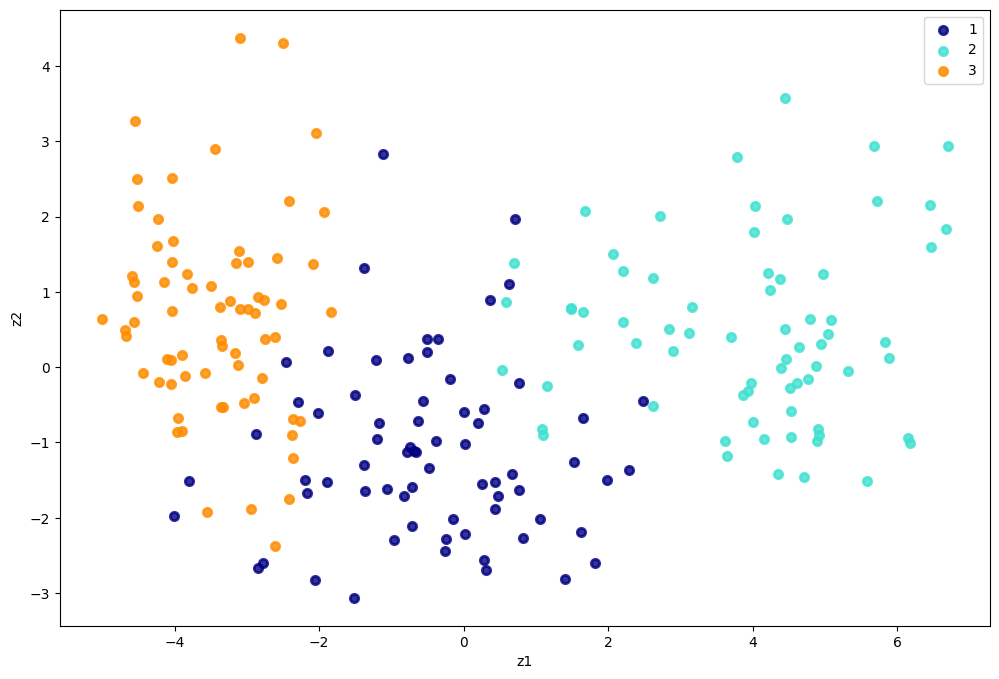

In [10]:
pca = PCA(n_components=2) # уменьшаем до двух параметров
X_new = pca.fit(X).transform(X)
# fit подбирает параметры для PCA
# transform применяет эти параметры к X получая новый набор данных X_new


plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i-1]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [11]:
pca.explained_variance_ratio_

array([0.82940537, 0.1636381 ])

In [12]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)

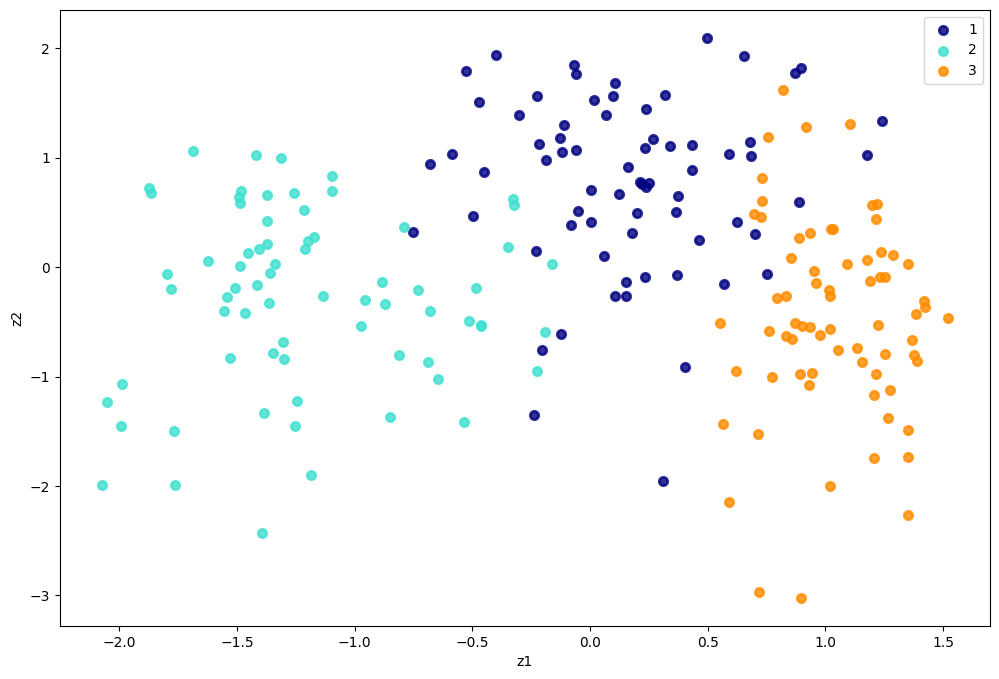

In [13]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i-1]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [14]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

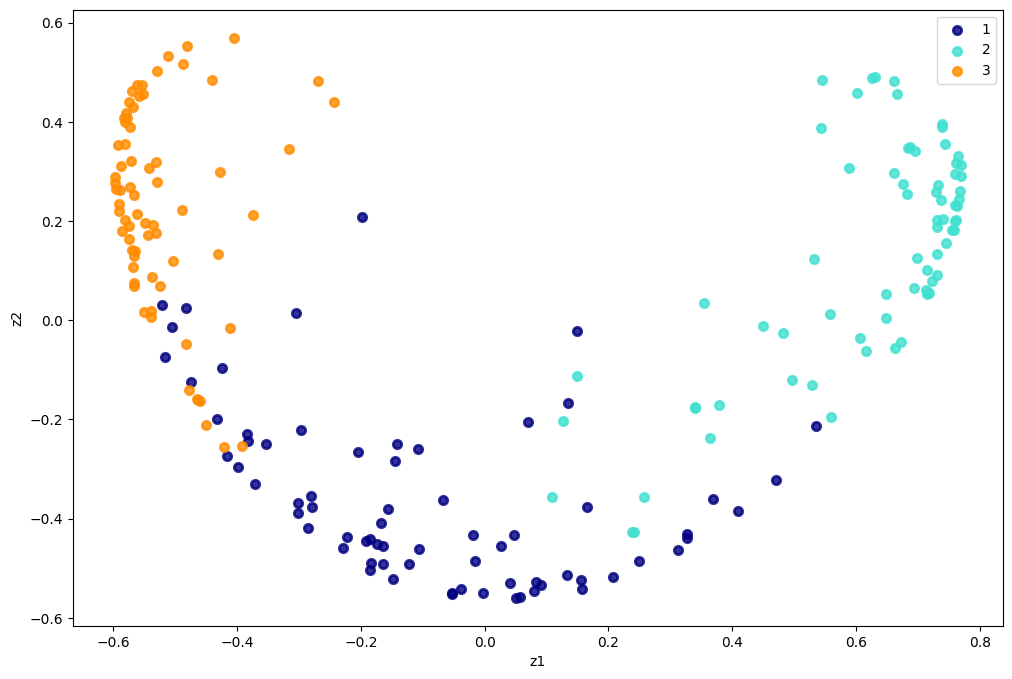

In [15]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i-1]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [17]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (210, 6)
New Shape of X:  (210, 2)
Kullback-Leibler divergence after optimization:  0.2159745842218399
No. of iterations:  949


Низкая дивергенция

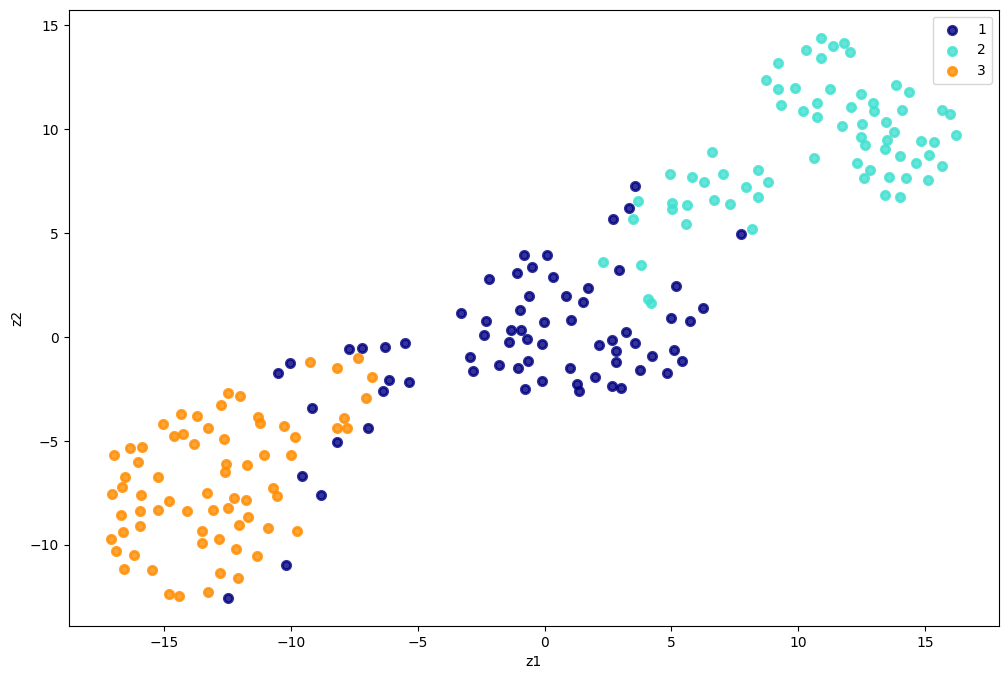

In [18]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [1, 2, 3], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i-1]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [20]:
dbscan_cluster1 = DBSCAN(eps = 0.8, min_samples = 8)
# eps - максимальное расстояние между двумя образцами для того, чтобы они считались в одном кластере.
# min_samples - минимальное количество точек, чтобы точка считалась "основной" и могла образовать кластер.

X_new = dbscan_cluster1.fit(X)

In [21]:
# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Количество шумовых точек
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 4
Estimated no. of noise points: 68
v_measure = 0.5074257391974684


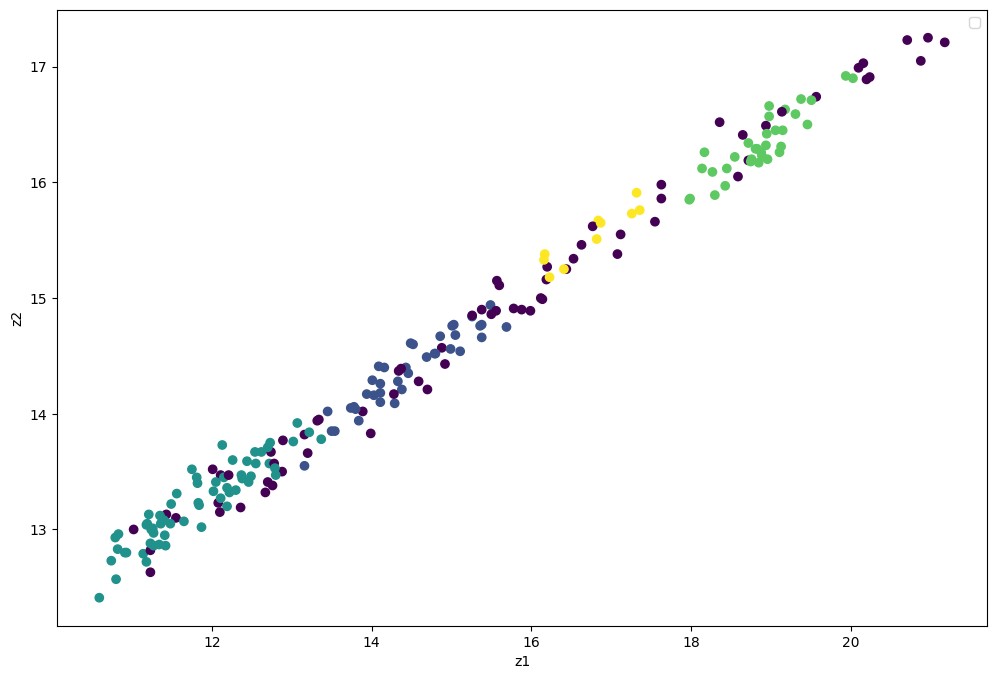

In [22]:
plt.figure(figsize=(12,8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

plt.scatter(
        X[cols_for_clusters[0]], X[cols_for_clusters[1]],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [23]:
from sklearn.neighbors import NearestNeighbors

min_samples = 8

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

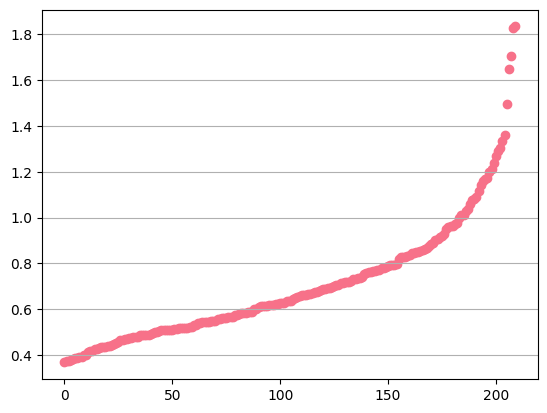

In [24]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.grid(True, axis='y')
plt.show()

In [25]:
dbscan = DBSCAN(eps = 0.8, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=0.8, min_samples=8)


In [26]:
pred = dbscan.fit_predict(X)

In [27]:
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 4
Estimated no. of noise points: 68
v_measure = 0.5074257391974684


In [28]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

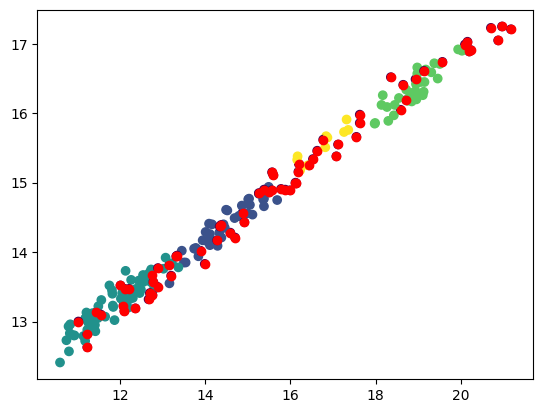

In [30]:
plt.scatter( X[cols_for_clusters[0]], X[cols_for_clusters[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols_for_clusters[0]], values[cols_for_clusters[1]], color='r')
plt.show()